In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [2]:
# Importing the datasets
path = r"C:\Users\hp\Desktop\Kaggle\basicshapes\shapes"
pict_path = path +"/circles/drawing(28).png"
print(os.path.exists(pict_path))
img = mpimg.imread(pict_path)

True


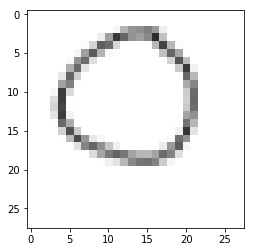

In [3]:
imgplot = plt.imshow(img)
plt.show()

In [4]:
shapes = ['triangles','circles','squares'] 

files = []
image_labels = []
images = []

for shape in shapes:                                      
     new_path = path + "\\" + shape                              
     for file in os.listdir(new_path):                    
        files.append(os.path.join(new_path,file))
        image_labels.append(shape)

for file in files:
    img = mpimg.imread(file)
    img = np.ravel(img)
    images.append(img)

images = pd.DataFrame(images)
image_labels = pd.DataFrame(image_labels)[0].str.get_dummies('EOL')

In [5]:
images.head()

,0,1,2,3,4,5,6,7,8,9,...,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
image_labels.head()

,circles,squares,triangles
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [8]:
# Splitting dataset into train and test dataset
def triangle():# Classifier: Triangle
    train_x, test_x, train_y, test_y = train_test_split(images, image_labels.drop(['circles','squares'],axis=1), test_size=0.2, random_state=6)
    train_x = train_x.T
    test_x = test_x.T
    # To prevent dimensions of the form (m,)
    # instead we want of the form (m,n)
    train_y = pd.DataFrame(train_y).T
    test_y = pd.DataFrame(test_y).T
    # To obtain array
    train_y = train_y.to_numpy()
    test_y = test_y.to_numpy()
    return train_x, test_x, train_y, test_y

def square():# Classifier: Square
    train_x, test_x, train_y, test_y = train_test_split(images, image_labels.drop(['circles','triangles'],axis=1), test_size=0.2, random_state=8)
    train_x = train_x.T
    test_x = test_x.T
    # To prevent dimensions of the form (m,)
    # instead we want of the form (m,n)
    train_y = pd.DataFrame(train_y).T
    test_y = pd.DataFrame(test_y).T
    # To obtain array
    train_y = train_y.to_numpy()
    test_y = test_y.to_numpy()
    return train_x, test_x, train_y, test_y

def circle():# Classifier: Circle
    train_x, test_x, train_y, test_y = train_test_split(images, image_labels.drop(['triangles','squares'],axis=1), test_size=0.2, random_state=15)
    train_x = train_x.T
    test_x = test_x.T
    # To prevent dimensions of the form (m,)
    # instead we want of the form (m,n)
    train_y = pd.DataFrame(train_y).T
    test_y = pd.DataFrame(test_y).T
    # To obtain array
    train_y = train_y.to_numpy()
    test_y = test_y.to_numpy()
    return train_x, test_x, train_y, test_y

In [9]:
def sigmoid(z):
    a = 1/(1+np.exp(-z))
    return a

def layer_size(X, Y): 
    n_x = X.shape[0]
    n_h = 4 # hard-coded single layer size
    n_y = Y.shape[0]
    
    return n_x, n_h, n_y

def initialize_parameters(X, Y):
    n_x, n_h, n_y = layer_size(X, Y)
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    parameters = {'W1': W1,
                  'b1': b1,
                  'W2': W2,
                  'b2': b2}
    return parameters

def forward_prop(X, parameters):
    W2 = parameters['W2']
    b2 = parameters['b2']
    W1 = parameters['W1']
    b1 = parameters['b1']
        
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)

    cache = {'Z1':Z1,
             'A1':A1,
             'Z2':Z2,
             'A2':A2}
    return A2, cache

def cost_function(A2, Y):    
    # Cross-entropy cost
    m = A2.shape[0]
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    
    cost = np.squeeze(cost)
    return cost

def back_prop(cache, parameters, X, Y): 
    A2 = cache['A2']
    Z2 = cache['Z2']
    A1 = cache['A1']
    Z1 = cache['Z1']
    
    W2 = parameters['W2']
    b2 = parameters['b2']
    W1 = parameters['W1']
    b1 = parameters['b1']
        
    
    m = X.shape[0]
    
    dZ2 = A2 - Y
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2)*(1-np.tanh(Z1)**2)
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {'dW2':dW2,
             'db2':db2,
             'dW1':dW1,
             'db1':db1}
    
    return grads

def update_parameters(grads, parameters, learning_rate):
    W2 = parameters['W2']
    b2 = parameters['b2']
    W1 = parameters['W1']
    b1 = parameters['b1']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

def neural_network(X, Y,num_iterations=1000):
    n_x, n_h, n_y = layer_size(X, Y)
    parameters = initialize_parameters(X, Y)

    for i in range(0, num_iterations):
        A2, cache = forward_prop(X, parameters)
        cost = cost_function(A2, Y)
        grads = back_prop(cache, parameters, X, Y)
        parameters = update_parameters(grads, parameters, learning_rate=0.0005)
    return parameters

def predict(parameter, X):
    A2, cache = forward_prop(X, parameters)
    predictions = np.round(A2)    
    return predictions

In [10]:
classifier_list = [triangle(), circle(), square()]
for shape in range(len(classifier_list)):
    print('\nIris-', shapes[shape])
    train_x, test_x, train_y, test_y = classifier_list[shape]
    parameters = neural_network(train_x, train_y)
    predictions_train = predict(parameters, train_x)
    predictions_test = predict(parameters, test_x)
    print('Train Accuracy: %d' % float((np.dot(train_y,predictions_train.T) + np.dot(1 - train_y, 1 - predictions_train.T)) / float(train_y.size) * 100) + '%')
    print('Test Accuracy: %d' % float((np.dot(test_y,predictions_test.T) + np.dot(1 - test_y, 1 - predictions_test.T)) / float(test_y.size) * 100) + '%')


Iris- triangles
Train Accuracy: 65%
Test Accuracy: 70%

Iris- circles
Train Accuracy: 68%
Test Accuracy: 58%

Iris- squares
Train Accuracy: 66%
Test Accuracy: 68%
